In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [2]:
glass = pd.read_csv('../Cases/Glass_Identification/Glass.csv')
X = glass.drop('Type', axis=1)
y = glass['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.6615384615384615


C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
penalties = ['l1','l2','elasticnet',None]

score = []

for p in penalties:
    lr = LogisticRegression(solver='saga', penalty=p, l1_ratio=0.5)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score.append([p, accuracy_score(y_pred, y_test)])
score = pd.DataFrame(score, columns=['method', 'score'])

print(score)

       method     score
0          l1  0.538462
1          l2  0.538462
2  elasticnet  0.538462
3        None  0.538462


C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reache

In [4]:
penalties = ['l2',None]
solvers = ['sag', 'newton-cg','newton-cholesky','lbfgs']
score = []
for s in solvers:
    for p in penalties:
        lr = LogisticRegression(solver=s, penalty=p)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        score.append([s, p, accuracy_score(y_pred, y_test)])

score = pd.DataFrame(score, columns=['solver', 'penalty', 'score'])
score

C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.5297977463867943. Increase the number of iterations.
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:591: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 13. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such si

,solver,penalty,score
0,sag,l2,0.538462
1,sag,None,0.538462
2,newton-cg,l2,0.661538
3,newton-cg,None,0.630769
4,newton-cholesky,l2,0.661538
5,newton-cholesky,None,0.630769
6,lbfgs,l2,0.661538
7,lbfgs,None,0.615385


In [5]:
le = LabelEncoder()

y = le.fit_transform(glass['Type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=25)

lr = LogisticRegression(solver='newton-cg', penalty='l2')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.6615384615384615
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        23
           1       0.74      0.61      0.67        28
           2       0.50      0.50      0.50         4
           3       0.89      0.89      0.89         9
           4       0.33      1.00      0.50         1
           5       0.00      0.00      0.00         0

    accuracy                           0.66        65
   macro avg       0.53      0.61      0.54        65
weighted avg       0.73      0.66      0.69        65



C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

In [6]:
array = np.array([[10,100,1000],
                  [20,200,2000],
                  [30,300,3000],
                  [40,400,4000]])

print(array.mean(axis=0), array.std(axis=0))

ss = StandardScaler().set_output(transform='pandas')
array_scaled = ss.fit_transform(array)

print(array_scaled)
print(array_scaled.mean())
print(array_scaled.std())

[  25.  250. 2500.] [  11.18033989  111.80339887 1118.03398875]
         x0        x1        x2
0 -1.341641 -1.341641 -1.341641
1 -0.447214 -0.447214 -0.447214
2  0.447214  0.447214  0.447214
3  1.341641  1.341641  1.341641
x0    0.0
x1    0.0
x2    0.0
dtype: float64
x0    1.154701
x1    1.154701
x2    1.154701
dtype: float64


In [7]:
array = np.array([[10,100,1000],
                  [20,200,2000],
                  [30,300,3000],
                  [40,400,4000]])

mm = MinMaxScaler().set_output(transform='pandas')

array_scaled = mm.fit_transform(array)

print(array_scaled) # scaled values will be between 0 & 1

print(array_scaled.mean(), array_scaled.std())

         x0        x1        x2
0  0.000000  0.000000  0.000000
1  0.333333  0.333333  0.333333
2  0.666667  0.666667  0.666667
3  1.000000  1.000000  1.000000
x0    0.5
x1    0.5
x2    0.5
dtype: float64 x0    0.430331
x1    0.430331
x2    0.430331
dtype: float64


In [8]:
# K- Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier

In [9]:
cancer = pd.read_csv('../Cases/Wisconsin/BreastCancer.csv')

X = cancer.drop(['Code', 'Class'], axis=1)
y = cancer['Class']


scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append([i, accuracy_score(y_pred, y_test)])

scores = pd.DataFrame(scores, columns=['k', 'score'])
scores

,k,score
0,1,0.957143
1,2,0.933333
2,3,0.971429
3,4,0.961905
4,5,0.976190
5,6,0.952381
6,7,0.961905
7,8,0.961905
8,9,0.961905
9,10,0.961905


In [10]:
hr = pd.read_csv('../Cases/HRAnalytics/HR_comma_sep.csv')

X = hr.drop('left', axis=1)
y = hr['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

scaler = StandardScaler()

X_train_scl = scalar.fit_transform(X_train)
X_test_scl = scalar.transform(X_test)

scores = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scl, y_train)
    y_pred = knn.predict(X_test_scl)

    scores.append([k, accuracy_score(y_pred, y_test)])

scores = pd.DataFrame(scores, columns=['k', 'score'])
print(scores)

NameError: name 'scalar' is not defined

C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8159859690435892

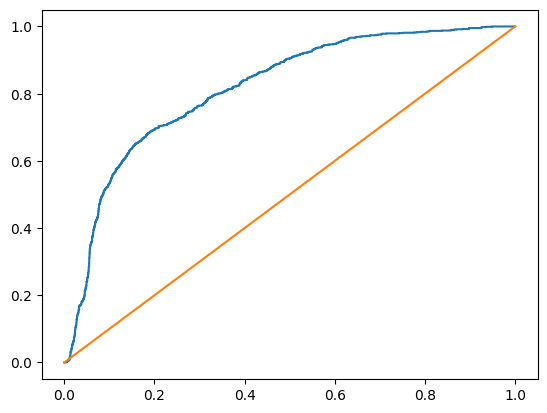

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
y = hr['left']
X = hr.drop('left',axis = 1)
X = pd.get_dummies(X,drop_first=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

roc_auc_score(y_test, y_pred)

In [21]:
solvers = ['sag', 'newton-cg','newton-cholesky','lbfgs']
penalties = ['l2',None]

hr = pd.read_csv('../Cases/HRAnalytics/HR_comma_sep.csv')
hr_dummy = pd.get_dummies(hr,drop_first=True) #converting categorical data into numerical data

X = hr_dummy.drop('left',axis=1)
y = hr_dummy['left']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

score = []
for s in solvers: 
    for p in penalties:
        lr = LogisticRegression(solver=s,penalty=p)
        lr.fit(X_train,y_train)
        y_pred = lr.predict_proba(X_test)[:,1]
        score.append([s,p,roc_auc_score(y_test,y_pred)])
df = pd.DataFrame(score,columns=['solver','Penalty','ROC AUC Score'])
df.sort_values('ROC AUC Score',ascending=False)

C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,solver,Penalty,ROC AUC Score
2,newton-cg,l2,0.822300
4,newton-cholesky,l2,0.822268
5,newton-cholesky,None,0.822144
3,newton-cg,None,0.822140
7,lbfgs,None,0.816266
6,lbfgs,l2,0.815986
1,sag,None,0.810168
0,sag,l2,0.810085
